In [2]:
import plotly.offline as py
from plotly.graph_objs import *
import pandas as pd
import math
py.init_notebook_mode()

In [3]:
path = './cmake-build-debug'

In [52]:
my_cols=['t',
         'px_gt','py_gt','vx_gt','vy_gt',
         'px_est','py_est','vx_est','vy_est',
         'px_meas','py_meas',
         'NIS',
         'v', 'psi', 'psid',
         'sigx','sigy','anglexy',
         'sigx_pr','sigy_pr','anglexy_pr'
        ]
with open(path+'/output-1.txt') as f:
    table_ekf_output1 = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n', index_col=False)
    
with open(path+'/output-2.txt') as f:
    table_ekf_output2 = pd.read_table(f, sep='\t', header=None, names=my_cols, lineterminator='\n', index_col=False)


In [53]:
table_ekf_output1

,t,px_gt,py_gt,vx_gt,vy_gt,px_est,py_est,vx_est,vy_est,px_meas,...,NIS,v,psi,psid,sigx,sigy,anglexy,sigx_pr,sigy_pr,anglexy_pr
0,0.000000,8.60,2.500000e-01,-3.000290,0.000000,8.46292,0.243462,0.000000,0.000000e+00,8.46292,...,6.953230e-310,0.000000,0.000000e+00,0.000000e+00,0.022500,0.022500,0.000000e+00,0.022500,0.022500,0.000000e+00
1,0.049996,8.45,2.500000e-01,-3.000270,0.000000,8.45551,0.247508,-0.001629,7.065960e-21,8.44818,...,6.255490e-03,-0.001629,-4.336810e-18,-2.033290e-27,0.011312,0.011250,4.718020e-23,0.022750,0.022500,5.371440e-23
2,0.100053,8.45,2.500000e-01,0.000000,0.000000,8.46739,0.244906,-0.009033,-2.334090e-08,8.56759,...,1.266550e-01,-0.009033,2.583910e-06,1.239570e-07,0.010041,0.007435,-2.894920e-02,0.011811,0.011250,3.737860e-20
3,0.150110,8.45,2.500000e-01,0.000000,0.000000,8.46352,0.247145,-0.009396,1.170740e-07,8.45582,...,6.577470e-03,-0.009396,-1.246060e-05,-1.670000e-06,0.006982,0.005588,-2.813470e-02,0.010124,0.007435,-2.813500e-02
4,0.205061,8.35,2.500000e-01,-1.819790,0.000000,8.34992,0.248106,-0.898743,-1.954220e-03,8.42544,...,1.775320e+02,-0.898746,2.174390e-03,4.762860e-04,0.006504,0.004454,-2.835660e-02,0.007091,0.005588,-2.616280e-02
5,0.260013,8.25,2.500000e-01,-1.819780,0.000000,8.28869,0.248100,-0.900629,-1.742040e-03,8.23962,...,1.384340e-01,-0.900631,1.934250e-03,4.178780e-04,0.005102,0.003883,-3.033580e-02,0.006597,0.004692,-3.033700e-02
6,0.310016,8.05,2.000000e-01,-3.999760,-0.999940,8.06586,0.207968,-1.534270,-6.795070e-01,7.93286,...,4.595300e+02,-1.678010,4.169230e-01,1.190110e-01,0.004849,0.003669,-3.123800e-02,0.005191,0.004456,-4.832440e-02
7,0.360020,7.85,1.500000e-01,-3.999720,-0.999930,7.96550,0.174614,-1.541350,-6.741680e-01,7.84073,...,8.559900e-01,-1.682340,4.123160e-01,1.155200e-01,0.004543,0.003905,-2.196800e+00,0.005692,0.004725,-2.196800e+00
8,0.410023,7.70,1.500000e-01,-2.999820,0.000000,7.74366,0.459468,-0.260590,1.789900e+00,7.61269,...,5.573030e+01,-1.808770,-1.426220e+00,-5.752510e-01,0.003909,0.003228,6.529330e-02,0.007258,0.004010,-1.971590e+00
9,0.460026,7.55,1.500000e-01,-2.999820,0.000000,7.69840,0.496429,-0.361314,1.787350e+00,7.54016,...,7.159770e+00,-1.823500,-1.371330e+00,-5.580140e-01,0.003512,0.002756,-3.710870e-01,0.004162,0.003141,-3.710880e-01


In [54]:
table_ekf_output2

,t,px_gt,py_gt,vx_gt,vy_gt,px_est,py_est,vx_est,vy_est,px_meas,...,NIS,v,psi,psid,sigx,sigy,anglexy,sigx_pr,sigy_pr,anglexy_pr
0,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,...,6.953230e-310,0.00000,0.000000e+00,0.000000e+00,0.022500,0.022500,0.000000e+00,0.022500,0.022500,0.000000e+00
1,0,0.00000,0.000000,0.00000,0.000000,0.256798,0.000000,0.000000,0.000000e+00,0.00000,...,3.250970e+00,0.00000,0.000000e+00,0.000000e+00,0.022500,0.000261,1.570800e+00,0.022500,0.022500,0.000000e+00
2,1,2.09897,0.052223,2.19595,0.109339,1.489990,-0.069251,1.697720,-3.306070e-17,1.55945,...,4.447240e+00,1.69772,-1.947360e-17,-2.110190e-17,0.021300,0.011250,1.080200e-18,0.399511,0.022500,1.080200e-18
3,1,2.09897,0.052223,2.19595,0.109339,1.601620,-0.033723,2.343370,-6.871950e-02,1.81209,...,2.652970e+00,2.34437,-2.931670e-02,-1.509220e-02,0.015567,0.007405,2.751270e-02,0.021300,0.011250,-3.763620e-15
4,2,4.29136,0.215312,2.28434,0.226323,3.873530,-0.132045,2.724130,-2.002690e-01,3.89093,...,2.492310e-01,2.73148,-7.338470e-02,-2.715180e-02,0.022128,0.021267,-1.460840e+00,1.338970,0.387973,-1.460840e+00
5,2,4.29136,0.215312,2.28434,0.226323,3.913020,-0.089108,2.443240,-1.284770e-01,4.19528,...,2.002800e+00,2.44662,-5.253610e-02,-2.120880e-02,0.019199,0.015807,-1.525110e+00,0.022128,0.021267,-1.460790e+00
6,3,6.56942,0.496096,2.36382,0.348847,6.825940,0.377888,3.048520,7.946090e-01,6.86352,...,2.093440e+00,3.15038,2.549800e-01,1.719380e-01,0.021193,0.021044,-1.727150e+00,0.364854,0.325095,-1.727150e+00
7,3,6.56942,0.496096,2.36382,0.348847,6.712160,0.390663,2.443010,6.716000e-01,6.43926,...,2.288360e+00,2.53364,2.682800e-01,1.876980e-01,0.020115,0.015246,-1.508680e+00,0.021193,0.021044,-1.727180e+00
8,4,8.92437,0.899240,2.43359,0.474526,9.066860,0.637934,2.276280,4.064650e-01,9.07733,...,1.388350e+00,2.31228,1.767030e-01,4.079810e-02,0.021206,0.020708,-9.815570e-01,0.368717,0.259919,-9.815610e-01
9,4,8.92437,0.899240,2.43359,0.474526,9.059920,0.648755,2.503810,4.535910e-01,8.89749,...,5.394790e-01,2.54456,1.792170e-01,4.285880e-02,0.020397,0.015072,-1.682540e+00,0.021206,0.020707,-9.814790e-01


In [55]:
#estimations
trace11 = Scatter(
    x=table_ekf_output1['px_est'],
    y=table_ekf_output1['py_est'],
    xaxis='x2',
    yaxis='y2',
    name='UKF-Estimate'
)
#estimations
trace12 = Scatter(
    x=table_ekf_output2['px_est'],
    y=table_ekf_output2['py_est'],
    xaxis='x2',
    yaxis='y2',
    name='UKF-Estimate'
)

#Measurements
trace21 = Scatter(
    x=table_ekf_output1['px_meas'],
    y=table_ekf_output1['py_meas'],
    xaxis='x2',
    yaxis='y2',
    name = 'Measurements',
    mode = 'markers'
)
#Measurements
trace22 = Scatter(
    x=table_ekf_output2['px_meas'],
    y=table_ekf_output2['py_meas'],
    xaxis='x2',
    yaxis='y2',
    name = 'Measurements',
    mode = 'markers'
)

#Measurements
trace31 = Scatter(
    x=table_ekf_output1['px_gt'],
    y=table_ekf_output1['py_gt'],
    xaxis='x2',
    yaxis='y2',
    name = 'Ground Truth'
)
#Measurements
trace32 = Scatter(
    x=table_ekf_output2['px_gt'],
    y=table_ekf_output2['py_gt'],
    xaxis='x2',
    yaxis='y2',
    name = 'Ground Truth'
)

data1 = [trace11, trace21, trace31]
data2 = [trace12, trace22, trace32]

layout = Layout(
    xaxis2=dict(
        anchor='x2',
        title='px'
    ),
    yaxis2=dict(
    
        anchor='y2',
        title='py'
    )
)

fig1 = Figure(data=data1, layout=layout)
fig2 = Figure(data=data2, layout=layout)
py.plot(fig1, filename= 'UKF_data1.html');
py.plot(fig2, filename= 'UKF_data2.html');

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Ellipse
import math
%matplotlib inline

In [70]:
N = len(table_ekf_output1)

In [71]:
N

1224

In [72]:
t = table_ekf_output1.t
xGT = table_ekf_output1.px_gt.values
yGT = table_ekf_output1.py_gt.values
vxGT = table_ekf_output1.vx_gt.values
vyGT = table_ekf_output1.vy_gt.values

xMES = table_ekf_output1.px_meas.values
yMES = table_ekf_output1.py_meas.values

xEST = table_ekf_output1.px_est.values
yEST = table_ekf_output1.py_est.values
vxEST = table_ekf_output1.vx_est.values
vyEST = table_ekf_output1.vy_est.values
# posterior uncertainty
sigxEST = table_ekf_output1.sigx.values
sigyEST = table_ekf_output1.sigy.values
angleEST = table_ekf_output1.anglexy.values
# prior uncertainty
sigxEST_pr = table_ekf_output1.sigx_pr.values
sigyEST_pr = table_ekf_output1.sigy_pr.values
angleEST_pr = table_ekf_output1.anglexy_pr.values

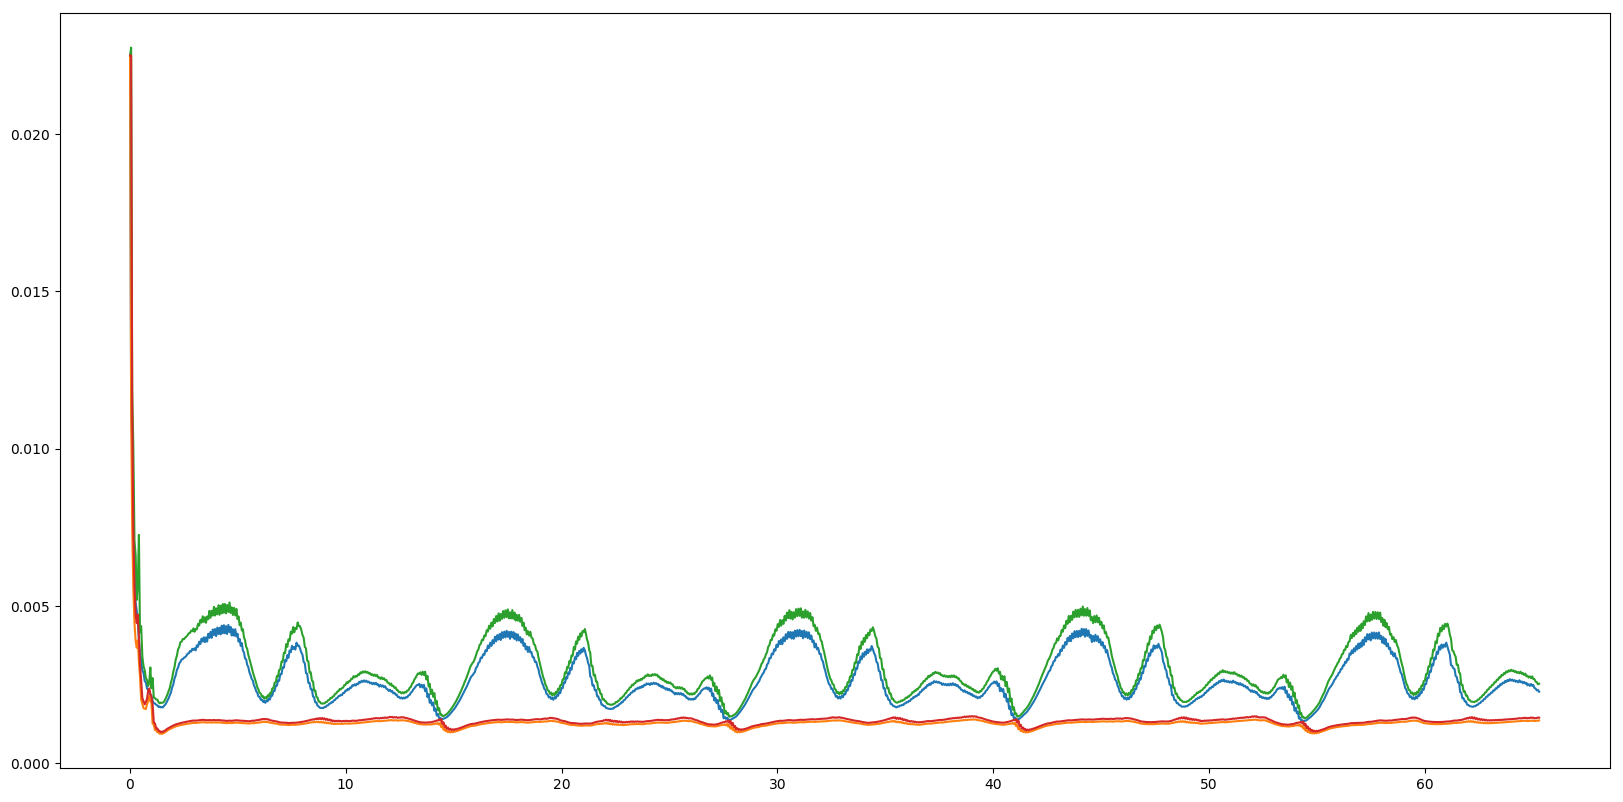

In [73]:
plt.plot(t, sigxEST, t, sigyEST, t, sigxEST_pr, t, sigyEST_pr);

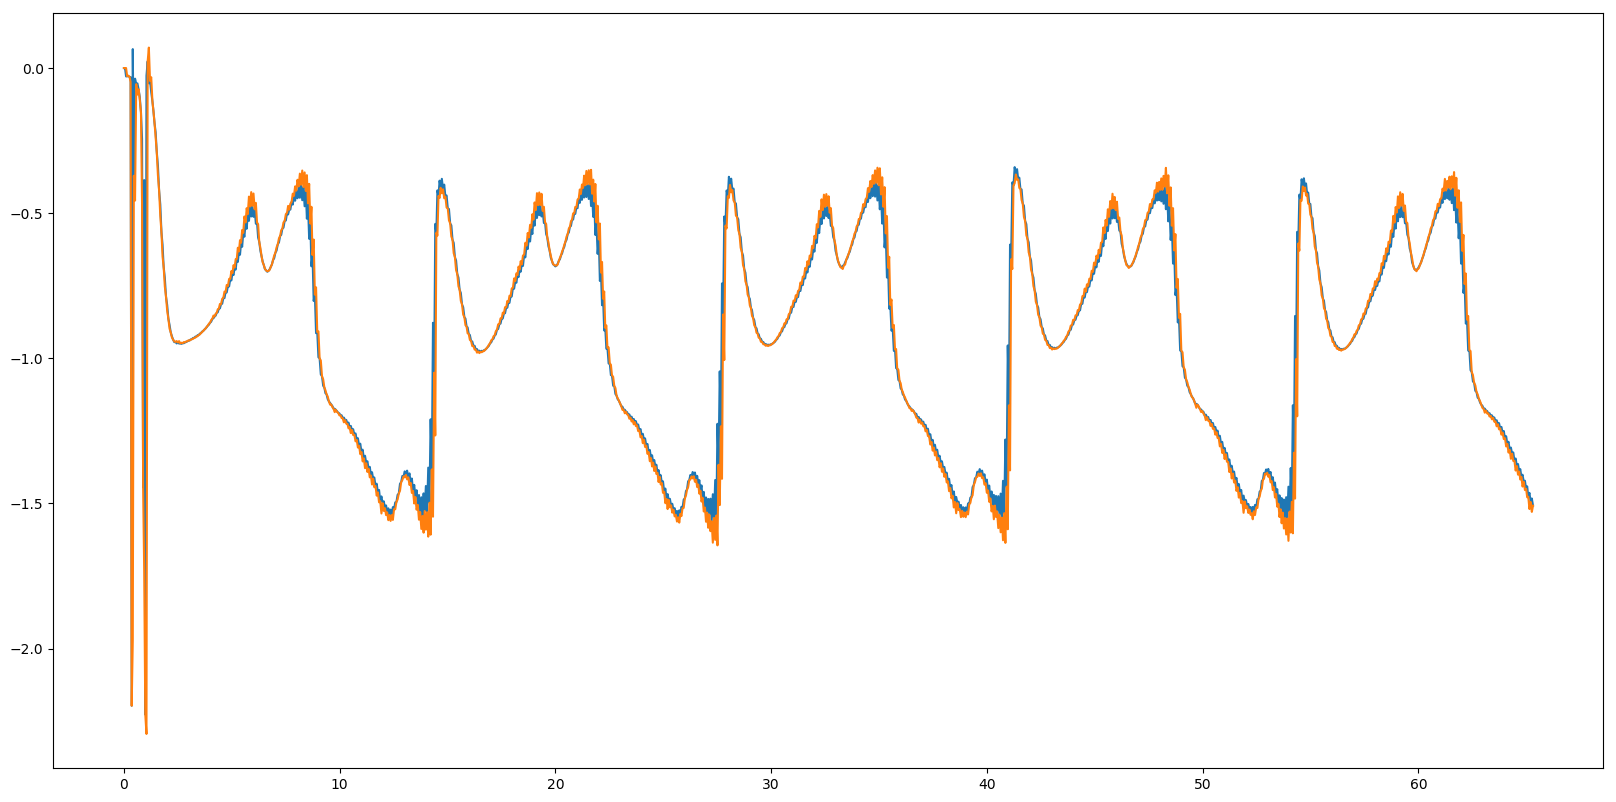

In [74]:
plt.plot(t, angleEST, t, angleEST_pr);

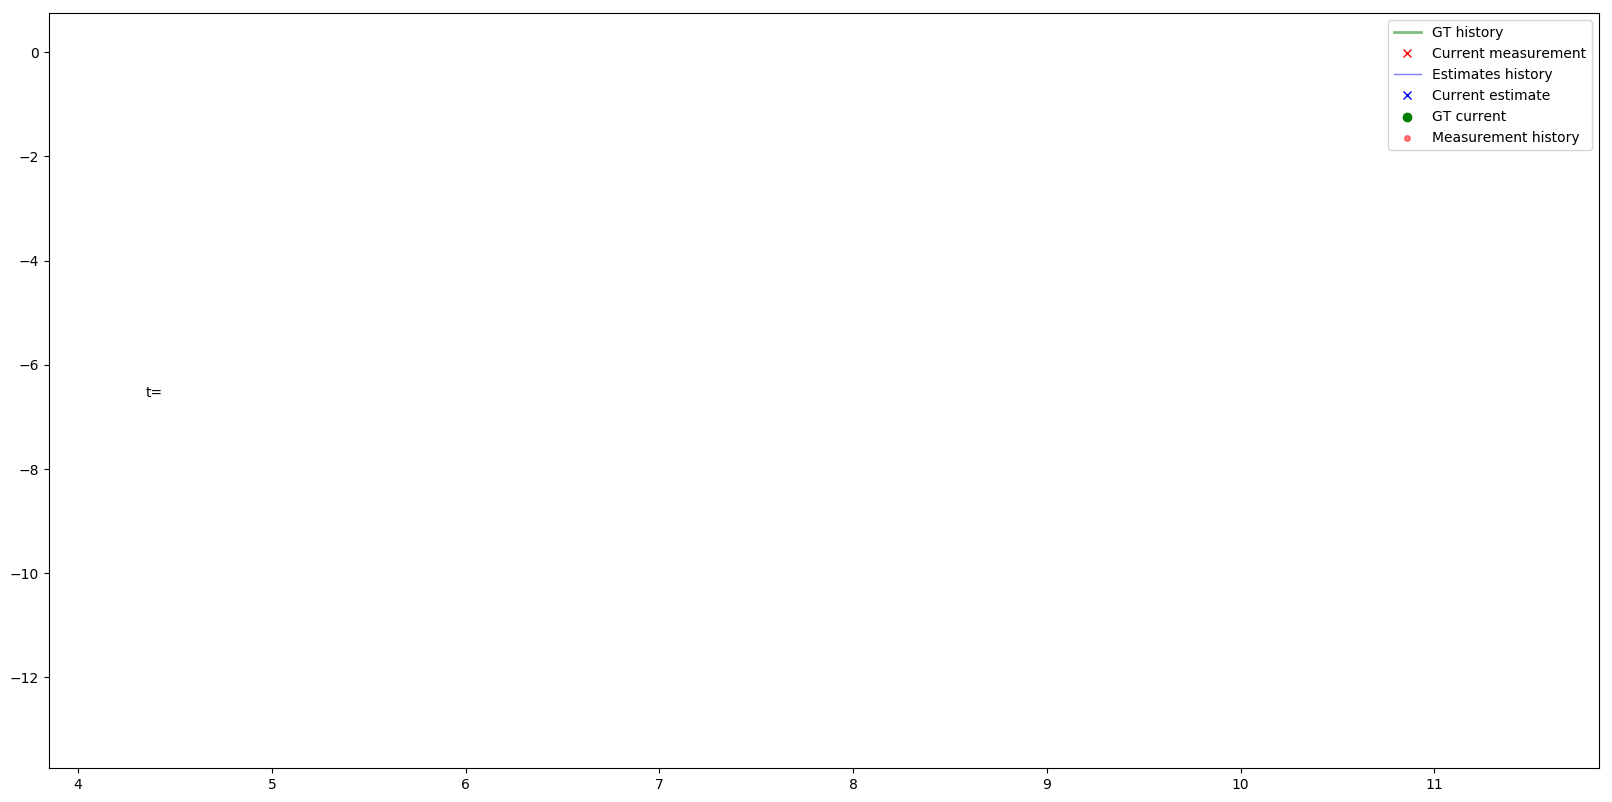

In [75]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure();
padding = 0.5
ax = plt.axes(xlim=(min(xGT)-padding, max(xGT)+padding), ylim=(min(yGT)-padding, max(yGT)+padding));
textTime = ax.text(min(xGT), sum(yGT)/len(yGT), 't=')
lineGT, = ax.plot([], [], 'g', lw=2, alpha=0.5, label='GT history');
pointGT = ax.scatter([],[],   s=36, c='g', alpha=1,   label='GT current');
lineMES = ax.scatter([], [], s=16, c='r', alpha=0.5, label='Measurement history');
pointMES, = ax.plot([],[], 'rx', lw=7, label='Current measurement');
lineEST, = ax.plot([], [], 'b', lw=1, alpha=0.5, label='Estimates history');
pointEST, = ax.plot([],[], 'bx', lw=10, label='Current estimate');
speedGT = ax.arrow(0,0,0,0, fc='k', ec='k')
speedEST = ax.arrow(0,0,0,0, fc='m', ec='m')
confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.4, fc='y')
confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0, alpha=0.2, fc='c')
ax.legend();

In [76]:
# initialization function: plot the background of each frame
def init():
    textTime.set_text('t = ')
    lineGT.set_data([], [])
    pointGT.set_offsets([])
    lineMES.set_offsets([])
    pointMES.set_data([], [])
    lineEST.set_data([], [])
    pointEST.set_data([], [])

    global speedGT
    global speedEST
    speedGT = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedGT)
    speedEST = ax.arrow(0, 0, 0, 0)
    ax.add_patch(speedEST)
    
    global confEST
    confEST = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST)
    global confEST_pr
    confEST_pr = Ellipse(xy=[0,0], width=0, height=0, angle=0)
    ax.add_patch(confEST_pr)

    return textTime, lineGT, pointGT, speedGT, speedEST, confEST, confEST_pr

In [77]:
ellipse_factor = 100

In [78]:
# animation function.  This is called sequentially
def animate(i):
    textTime.set_text('t = {0:.3f}'.format(t[i]))
    lineGT.set_data(xGT[:i], yGT[:i])
    pointGT.set_offsets([xGT[i],yGT[i]])
    lineMES.set_offsets(np.hstack((xMES[:i,np.newaxis], yMES[:i, np.newaxis])))
    pointMES.set_data(xMES[i], yMES[i])
    lineEST.set_data(xEST[:i], yEST[:i])
    pointEST.set_data(xEST[i], yEST[i])
    
    speedGT.set_xy([[xGT[i],yGT[i]],[xGT[i]+vxGT[i]/10, yGT[i]+vyGT[i]/10]])
    speedEST.set_xy([[xEST[i],yEST[i]],[xEST[i]+vxEST[i]/10, yEST[i]+vyEST[i]/10]])

    # posterior uncertainty
    confEST.center = (xEST[i],yEST[i])
    confEST.width = sigxEST[i]*ellipse_factor
    confEST.height = sigyEST[i]*ellipse_factor
    confEST.angle = angleEST[i]/math.pi*180
    # prior uncertainty
    confEST_pr.center = (xEST[i],yEST[i])
    confEST_pr.width = sigxEST_pr[i]*ellipse_factor
    confEST_pr.height = sigyEST_pr[i]*ellipse_factor
    confEST_pr.angle = angleEST_pr[i]/math.pi*180
    
    return textTime, lineGT, pointGT, lineMES, pointMES, lineEST, pointEST, speedGT, speedEST, confEST, confEST_pr

In [79]:
#N=250

In [80]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=N, 
#                               interval=20, # delay in ms
                               blit=True)

In [81]:
# brew install ffmpeg

In [82]:
%time anim.save('ukf_animation_1.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

CPU times: user 1min 40s, sys: 5.93 s, total: 1min 46s
Wall time: 1min 47s
